# COVID-19

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from fbprophet import Prophet
import pycountry
import plotly.express as px
from collections import namedtuple

In [3]:
# Get the latest data
!git clone https://github.com/CSSEGISandData/COVID-19

Cloning into 'COVID-19'...

Updating files:  51% (126/243)

Updating files:  52% (127/243)

Updating files:  53% (129/243)

Updating files:  54% (132/243)

Updating files:  55% (134/243)

Updating files:  56% (137/243)

Updating files:  57% (139/243)

Updating files:  58% (141/243)

Updating files:  59% (144/243)

Updating files:  60% (146/243)

Updating files:  61% (149/243)

Updating files:  62% (151/243)

Updating files:  63% (154/243)

Updating files:  64% (156/243)

Updating files:  65% (158/243)

Updating files:  66% (161/243)

Updating files:  67% (163/243)

Updating files:  68% (166/243)

Updating files:  69% (168/243)

Updating files:  70% (171/243)

Updating files:  71% (173/243)

Updating files:  72% (175/243)

Updating files:  73% (178/243)

Updating files:  74% (180/243)

Updating files:  75% (183/243)

Updating files:  76% (185/243)

Updating files:  77% (188/243)

Updating files:  78% (190/243)

Updating files:  78% (191/243)

Updating files:  79% (192/243)

Updating fil

In [27]:
cases = pd.read_csv('C:/Users/erick/Desktop/ML_Projects/Covid2/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
cases.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/12/20  4/13/20  4/14/20  4/15/20  \
0        0        0        0  ...      607      665      714      784   
1        0        0        0  ...      446      467      475      494   
2        0        0        0  ...     1914     1983     2070     2160   
3        0        0        0  ...      638      646      659      673   
4        0        0        0  ...       19       19       19       19   

   4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  
0      840      906      933      996     1026     1092  
1      518      539      548      562      584      609  
2     2268     2418     2534     2629     2718     2811  
3      673      696      704      713      717      717  
4       19       19       24       24       24       24  

[5 rows x 95 columns]

In [28]:
deaths = pd.read_csv('C:/Users/erick/Desktop/ML_Projects/Covid2/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
deaths.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/12/20  4/13/20  4/14/20  4/15/20  \
0        0        0        0  ...       18       21       23       25   
1        0        0        0  ...       23       23       24       25   
2        0        0        0  ...      293      313      326      336   
3        0        0        0  ...       29       29       31       33   
4        0        0        0  ...        2        2        2        2   

   4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  
0       30       30       30       33       36       36  
1       26       26       26       26       26       26  
2      348      364      367      375      384      392  
3       33       35       35       36       37       37  
4        2        2        2        2        2        2  

[5 rows x 95 columns]

In [29]:
recovered = pd.read_csv('C:/Users/erick/Desktop/ML_Projects/Covid2/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
recovered.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/12/20  4/13/20  4/14/20  4/15/20  \
0        0        0        0  ...       32       32       40       43   
1        0        0        0  ...      217      232      248      251   
2        0        0        0  ...      591      601      691      708   
3        0        0        0  ...      128      128      128      169   
4        0        0        0  ...        4        4        5        5   

   4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  
0       54       99      112      131      135      150  
1      277      283      302      314      327      345  
2      783      846      894     1047     1099     1152  
3      169      191      205      235      248      282  
4        5        5        6        6        6        6  

[5 rows x 95 columns]

# Trying to add all the countries with their regions and states by to trying and maintain a consistent mapping.

In [30]:
# Download a list of countries from the UN
!curl -o EF.xlsx https://untermportal.un.org/unterm/country/downloadfile?targetLanguage=fr

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100 11198  100 11198    0     0   5470      0  0:00:02  0:00:02 --:--:--  7792


In [31]:
countries = pd.read_excel('EF.xlsx')[:193]
countries.tail(2)

English short   French short            English formal  \
191        Zambia    Zambie (la)    the Republic of Zambia   
192      Zimbabwe  Zimbabwe (le)  the Republic of Zimbabwe   

                 French formal  
191    la République de Zambie  
192  la République du Zimbabwe

In [32]:
# Which regions in the JHU data have direct matches in countries?
print(deaths.shape, deaths['Country/Region'].unique().shape)
print(deaths.loc[deaths['Country/Region'].isin(countries['English short'].values)]['Country/Region'].unique().shape)

(264, 95) (185,)
(152,)


In [33]:
# For those with direct matches, add a new column ['Territory']
deaths['Territory'] = ''
for c in deaths.loc[deaths['Country/Region'].isin(countries['English short'].values)]['Country/Region'].unique():
  deaths.loc[deaths['Country/Region'] == c, 'Territory'] = c

# Same for cases
cases['Territory'] = ''
for c in cases.loc[cases['Country/Region'].isin(countries['English short'].values)]['Country/Region'].unique():
  cases.loc[cases['Country/Region'] == c, 'Territory'] = c

# Same for recovered
recovered['Territory'] = ''
for c in recovered.loc[recovered['Country/Region'].isin(countries['English short'].values)]['Country/Region'].unique():
  recovered.loc[recovered['Country/Region'] == c, 'Territory'] = c

deaths.loc[deaths['Country/Region']=='Taiwan*', 'Territory'] = 'Taiwan'
cases.loc[cases['Country/Region']=='Taiwan*', 'Territory'] = 'Taiwan'
recovered.loc[recovered['Country/Region']=='Taiwan*', 'Territory'] = 'Taiwan'

In [34]:
# The problem ones we need to reconcile manually:
print(deaths.loc[~deaths['Country/Region'].isin(countries['English short'].values)]['Country/Region'].unique())

['Bahamas' 'Bolivia' 'Brunei' 'Central African Republic'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' "Cote d'Ivoire"
 'Diamond Princess' 'Dominican Republic' 'Gambia' 'Holy See' 'Iran'
 'Korea, South' 'Moldova' 'Netherlands' 'Niger' 'Philippines' 'Russia'
 'Sudan' 'Taiwan*' 'Tanzania' 'United Arab Emirates' 'United Kingdom' 'US'
 'Venezuela' 'Vietnam' 'Syria' 'Laos' 'West Bank and Gaza' 'Kosovo'
 'Burma' 'MS Zaandam' 'Western Sahara']


In [35]:
# Add them manually:
deaths.loc[deaths['Country/Region'] == 'United Arab Emirates', 'Territory'] = 'United Arab Emirates (the)'
deaths.loc[deaths['Country/Region'] == 'Philippines', 'Territory'] = 'Philippines (the)'
deaths.loc[deaths['Country/Region'] == 'Dominican Republic', 'Territory'] = 'Dominican Republic (the)'
deaths.loc[deaths['Country/Region'] == 'Brunei', 'Territory'] = 'Brunei Darussalam'
deaths.loc[deaths['Country/Region'] == 'US', 'Territory'] = 'United States of America (the)'
deaths.loc[deaths['Country/Region'] == 'Iran', 'Territory'] = 'Iran (Islamic Republic of)'
deaths.loc[deaths['Country/Region'] == 'Korea, South', 'Territory'] = "Democratic People's Republic of Korea (the)" # IS this right?
deaths.loc[deaths['Country/Region'] == 'Vietnam', 'Territory'] = 'Viet Nam'
deaths.loc[deaths['Country/Region'] == 'Russia', 'Territory'] = 'Russian Federation (the)'
deaths.loc[deaths['Country/Region'] == 'Moldova', 'Territory'] = 'Republic of Moldova (the)'
deaths.loc[deaths['Country/Region'] == 'Bolivia', 'Territory'] = 'Bolivia (Plurinational State of)'
deaths.loc[deaths['Country/Region'] == 'United Kingdom', 'Territory'] = 'United Kingdom of Great Britain and Northern Ireland (the)'
deaths.loc[deaths['Country/Region'] == 'Congo (Kinshasa)', 'Territory'] = 'Democratic Republic of the Congo (the)' # <<< Please check
deaths.loc[deaths['Country/Region'] == "Cote d'Ivoire", 'Territory'] = "Côte d'Ivoire"
deaths.loc[deaths['Country/Region'] == 'Sudan', 'Territory'] = "South Sudan" #?
deaths.loc[deaths['Country/Region'] == 'Venezuela', 'Territory'] = "Venezuela (Bolivarian Republic of)"
deaths.loc[deaths['Country/Region'] == 'Central African Republic', 'Territory'] = 'Central African Republic (the)'
deaths.loc[deaths['Country/Region'] == 'Congo (Brazzaville)', 'Territory'] = 'Congo (the)'
deaths.loc[deaths['Country/Region'] == 'Netherlands', 'Territory'] = 'Netherlands (the)'
deaths.loc[deaths['Country/Region'] == 'Tanzania', 'Territory'] = 'United Republic of Tanzania (the)'
deaths.loc[deaths['Country/Region'] == 'Gambia', 'Territory'] = 'Gambia (the)'
deaths.loc[deaths['Country/Region'] == 'Bahamas', 'Territory'] = 'Bahamas (the)'
deaths.loc[deaths['Country/Region'] == 'Niger', 'Territory'] = 'Niger (the)'
deaths.loc[deaths['Country/Region'] == 'Syria', 'Territory'] = 'Syrian Arab Republic (the)'
deaths.loc[deaths['Country/Region'] == 'Laos', 'Territory'] = "Lao People's Democratic Republic (the)"

# Drop those without a country match (!! - check output to make sure we aren't missing new additions)
print('Dropping', deaths.loc[deaths['Territory'] == '']['Country/Region'].unique())
print(deaths.shape)
deaths=deaths.loc[deaths['Territory']!= '']
print(deaths.shape)

# And for cases
# Add them manually:
cases.loc[cases['Country/Region'] == 'United Arab Emirates', 'Territory'] = 'United Arab Emirates (the)'
cases.loc[cases['Country/Region'] == 'Philippines', 'Territory'] = 'Philippines (the)'
cases.loc[cases['Country/Region'] == 'Dominican Republic', 'Territory'] = 'Dominican Republic (the)'
cases.loc[cases['Country/Region'] == 'Brunei', 'Territory'] = 'Brunei Darussalam'
cases.loc[cases['Country/Region'] == 'US', 'Territory'] = 'United States of America (the)'
cases.loc[cases['Country/Region'] == 'Iran', 'Territory'] = 'Iran (Islamic Republic of)'
cases.loc[cases['Country/Region'] == 'Korea, South', 'Territory'] = "Democratic People's Republic of Korea (the)" # IS this right?
cases.loc[cases['Country/Region'] == 'Vietnam', 'Territory'] = 'Viet Nam'
cases.loc[cases['Country/Region'] == 'Russia', 'Territory'] = 'Russian Federation (the)'
cases.loc[cases['Country/Region'] == 'Moldova', 'Territory'] = 'Republic of Moldova (the)'
cases.loc[cases['Country/Region'] == 'Bolivia', 'Territory'] = 'Bolivia (Plurinational State of)'
cases.loc[cases['Country/Region'] == 'United Kingdom', 'Territory'] = 'United Kingdom of Great Britain and Northern Ireland (the)'
cases.loc[cases['Country/Region'] == 'Congo (Kinshasa)', 'Territory'] = 'Democratic Republic of the Congo (the)' # <<< Please check
cases.loc[cases['Country/Region'] == "Cote d'Ivoire", 'Territory'] = "Côte d'Ivoire"
cases.loc[cases['Country/Region'] == 'Sudan', 'Territory'] = "South Sudan" #?
cases.loc[cases['Country/Region'] == 'Venezuela', 'Territory'] = "Venezuela (Bolivarian Republic of)"
cases.loc[cases['Country/Region'] == 'Central African Republic', 'Territory'] = 'Central African Republic (the)'
cases.loc[cases['Country/Region'] == 'Congo (Brazzaville)', 'Territory'] = 'Congo (the)'
cases.loc[cases['Country/Region'] == 'Netherlands', 'Territory'] = 'Netherlands (the)'
cases.loc[cases['Country/Region'] == 'Tanzania', 'Territory'] = 'United Republic of Tanzania (the)'
cases.loc[cases['Country/Region'] == 'Gambia', 'Territory'] = 'Gambia (the)'
cases.loc[cases['Country/Region'] == 'Bahamas', 'Territory'] = 'Bahamas (the)'
cases.loc[cases['Country/Region'] == 'Niger', 'Territory'] = 'Niger (the)'
cases.loc[cases['Country/Region'] == 'Syria', 'Territory'] = 'Syrian Arab Republic (the)'
cases.loc[cases['Country/Region'] == 'Laos', 'Territory'] = "Lao People's Democratic Republic (the)"

# Drop those without a country match (!! - check output to make sure we aren't missing new additions)
print('Dropping', cases.loc[cases['Territory'] == '']['Country/Region'].unique())
print(cases.shape)
cases=cases.loc[cases['Territory']!= '']
print(cases.shape)


# Add recovered manually:
recovered.loc[recovered['Country/Region'] == 'United Arab Emirates', 'Territory'] = 'United Arab Emirates (the)'
recovered.loc[recovered['Country/Region'] == 'Philippines', 'Territory'] = 'Philippines (the)'
recovered.loc[recovered['Country/Region'] == 'Dominican Republic', 'Territory'] = 'Dominican Republic (the)'
recovered.loc[recovered['Country/Region'] == 'Brunei', 'Territory'] = 'Brunei Darussalam'
recovered.loc[recovered['Country/Region'] == 'US', 'Territory'] = 'United States of America (the)'
recovered.loc[recovered['Country/Region'] == 'Iran', 'Territory'] = 'Iran (Islamic Republic of)'
recovered.loc[recovered['Country/Region'] == 'Korea, South', 'Territory'] = "Democratic People's Republic of Korea (the)" # IS this right?
recovered.loc[recovered['Country/Region'] == 'Vietnam', 'Territory'] = 'Viet Nam'
recovered.loc[recovered['Country/Region'] == 'Russia', 'Territory'] = 'Russian Federation (the)'
recovered.loc[recovered['Country/Region'] == 'Moldova', 'Territory'] = 'Republic of Moldova (the)'
recovered.loc[recovered['Country/Region'] == 'Bolivia', 'Territory'] = 'Bolivia (Plurinational State of)'
recovered.loc[recovered['Country/Region'] == 'United Kingdom', 'Territory'] = 'United Kingdom of Great Britain and Northern Ireland (the)'
recovered.loc[recovered['Country/Region'] == 'Congo (Kinshasa)', 'Territory'] = 'Democratic Republic of the Congo (the)' # <<< Please check
recovered.loc[recovered['Country/Region'] == "Cote d'Ivoire", 'Territory'] = "Côte d'Ivoire"
recovered.loc[recovered['Country/Region'] == 'Sudan', 'Territory'] = "South Sudan" #?
recovered.loc[recovered['Country/Region'] == 'Venezuela', 'Territory'] = "Venezuela (Bolivarian Republic of)"
recovered.loc[recovered['Country/Region'] == 'Central African Republic', 'Territory'] = 'Central African Republic (the)'
recovered.loc[recovered['Country/Region'] == 'Congo (Brazzaville)', 'Territory'] = 'Congo (the)'
recovered.loc[recovered['Country/Region'] == 'Netherlands', 'Territory'] = 'Netherlands (the)'
recovered.loc[recovered['Country/Region'] == 'Tanzania', 'Territory'] = 'United Republic of Tanzania (the)'
recovered.loc[recovered['Country/Region'] == 'Gambia', 'Territory'] = 'Gambia (the)'
recovered.loc[recovered['Country/Region'] == 'Bahamas', 'Territory'] = 'Bahamas (the)'
recovered.loc[recovered['Country/Region'] == 'Niger', 'Territory'] = 'Niger (the)'
recovered.loc[recovered['Country/Region'] == 'Syria', 'Territory'] = 'Syrian Arab Republic (the)'
recovered.loc[recovered['Country/Region'] == 'Laos', 'Territory'] = "Lao People's Democratic Republic (the)"

# Drop those without a country match (!! - check output to make sure we aren't missing new additions)
print('Dropping', recovered.loc[recovered['Territory'] == '']['Country/Region'].unique())
print(recovered.shape)
recovered=recovered.loc[recovered['Territory']!= '']
print(recovered.shape)

Dropping ['Diamond Princess' 'Holy See' 'West Bank and Gaza' 'Kosovo' 'Burma'
 'MS Zaandam' 'Western Sahara']
(264, 96)
(257, 96)
Dropping ['Diamond Princess' 'Holy See' 'West Bank and Gaza' 'Kosovo' 'Burma'
 'MS Zaandam' 'Western Sahara']
(264, 96)
(257, 96)
Dropping ['Diamond Princess' 'Holy See' 'West Bank and Gaza' 'Kosovo' 'Burma'
 'MS Zaandam' 'Western Sahara']
(250, 96)
(243, 96)


In [36]:
# Add the rest of the countries with cases set to 0 (!! Use with caution as data may be unreported)
import numpy as np

remainder = countries.loc[~countries['English short'].isin(deaths.Territory.unique())]
print('Adding:', remainder['English short'].unique())
for c in remainder['English short'].unique():
  row = pd.Series([0 for _ in range(len(deaths.columns))])
  row_df = pd.DataFrame([row])
  row_df.columns = deaths.columns
  row_df['Country/Region'] = c
  row_df['Territory'] = c
  deaths = pd.concat([deaths, row_df], ignore_index=True)
print(deaths.shape)

# And for cases
for c in remainder['English short'].unique():
  row = pd.Series([0 for _ in range(len(cases.columns))])
  row_df = pd.DataFrame([row])
  row_df.columns = cases.columns
  row_df['Country/Region'] = c
  row_df['Territory'] = c
  cases = pd.concat([cases, row_df], ignore_index=True)
print(cases.shape)


# And for recovered
for c in remainder['English short'].unique():
  row = pd.Series([0 for _ in range(len(recovered.columns))])
  row_df = pd.DataFrame([row])
  row_df.columns = recovered.columns
  row_df['Country/Region'] = c
  row_df['Territory'] = c
  recovered = pd.concat([recovered, row_df], ignore_index=True)
print(recovered.shape)

Adding: ['Comoros (the)' 'Kiribati' 'Lesotho' 'Marshall Islands (the)'
 'Micronesia (Federated States of)' 'Myanmar' 'Nauru' 'Palau'
 'Republic of Korea (the)' 'Samoa' 'Solomon Islands' 'Sudan (the)'
 'Tajikistan' 'Tonga' 'Turkmenistan' 'Tuvalu' 'Vanuatu']
(274, 96)
(274, 96)
(260, 96)


# Splitting out some regions into their own territories

Some regions are listed as part of one country, but due to geography or politics can be considered a separate entity. Without getting too political, let's separate out a few of these.

In [37]:
# Taiwan, St. Martin, Faroe Islands, St. Barthelemy, French Polynesia, French Guiana, Mayotte, Guadeloupe, Curacao, Cayman Islands, Reunion, Aruba, monserrat, Greenland, new caledonia, Bermuda.
for r in ['St Martin', 'Faroe Islands', 'Saint Barthelemy', 'French Polynesia', 'French Guiana', 'Mayotte',
          'Guadeloupe', 'Curacao', 'Cayman Islands', 'Reunion', 'Aruba', 'Montserrat', 'Greenland', 'New Caledonia', 'Bermuda']:
  if deaths.loc[deaths['Province/State']==r].shape[0]<1:
    print(r)
  deaths.loc[deaths['Province/State']==r, 'Territory'] = r
  cases.loc[cases['Province/State']==r, 'Territory'] = r
  recovered.loc[recovered['Province/State']==r, 'Territory'] 

In [38]:
#Reorder Columns
cols = list(deaths.columns)
deaths = deaths[cols[:2]+['Territory']+cols[2:-1]] # Better ordering
deaths.head()

Province/State Country/Region    Territory      Lat     Long  1/22/20  \
0            NaN    Afghanistan  Afghanistan  33.0000  65.0000        0   
1            NaN        Albania      Albania  41.1533  20.1683        0   
2            NaN        Algeria      Algeria  28.0339   1.6596        0   
3            NaN        Andorra      Andorra  42.5063   1.5218        0   
4            NaN         Angola       Angola -11.2027  17.8739        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  4/12/20  4/13/20  4/14/20  \
0        0        0        0        0  ...       18       21       23   
1        0        0        0        0  ...       23       23       24   
2        0        0        0        0  ...      293      313      326   
3        0        0        0        0  ...       29       29       31   
4        0        0        0        0  ...        2        2        2   

   4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  
0       25       30       30       30       33       36       36  
1       25       26       26       26       26       26       26  
2      336      348      364      367      375      384      392  
3       33       33       35       35       36       37       37  
4        2        2        2        2        2        2        2  

[5 rows x 96 columns]

In [39]:
#you can change the name of the country as you want

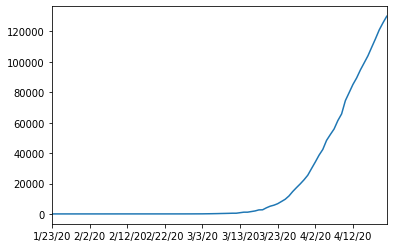

In [40]:
# Cases for mainland China (note - data is cumulative) 
cases.groupby('Territory').sum().loc['United Kingdom of Great Britain and Northern Ireland (the)'][3:].plot()


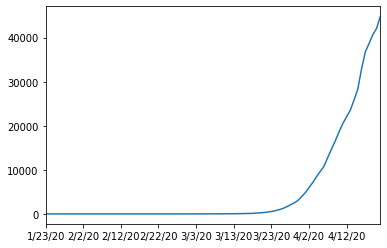

In [41]:
# Deaths in Italy
deaths.groupby('Territory').sum().loc['United States of America (the)'][3:].plot()

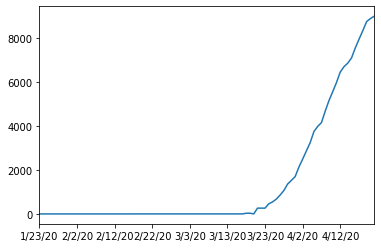

In [42]:
# Deaths in China
recovered.groupby('Territory').sum().loc['Belgium'][3:].plot()

# Creating 'gobal.csv'

You can shape your data in any way you want.

In [43]:
train_dates = deaths.columns[5:] # The dates for the train perion

# Grouping by territory
country_deaths = deaths.groupby('Territory').sum()[train_dates] 
country_cases = cases.groupby('Territory').sum()[train_dates] 
country_recover = recovered.groupby('Territory').sum()[train_dates] 

# Creating the dataframe
train = pd.DataFrame({
    'Territory X Date':list(map((lambda x: ' X '.join(x)), list(country_deaths.stack().index.to_flat_index()))), 
    'Deaths':country_deaths.stack(),
    'Confirmed':country_cases.stack(),
    'Recovered':country_recover.stack()
}).reset_index(drop=True)

# Add Separate Region and Date columns
train['Territory'] = train['Territory X Date'].apply(lambda x: x.split(' X ')[0])
train['Date'] = train['Territory X Date'].apply(lambda x: x.split(' X ')[1])

# Saving and viewing
train.to_csv('Train as at 18th April.csv', index=False)
train.tail()

Territory X Date  Deaths  Confirmed  Recovered Territory     Date
19014  Zimbabwe X 4/17/20       1          9        0.0  Zimbabwe  4/17/20
19015  Zimbabwe X 4/18/20       1         10        0.0  Zimbabwe  4/18/20
19016  Zimbabwe X 4/19/20       2         11        0.0  Zimbabwe  4/19/20
19017  Zimbabwe X 4/20/20       3         11        0.0  Zimbabwe  4/20/20
19018  Zimbabwe X 4/21/20       3         11        0.0  Zimbabwe  4/21/20

In [44]:
#Lets try grouping them
df_deaths = train.groupby('Date').sum()['Deaths'].reset_index()
df_confirmed = train.groupby('Date').sum()['Confirmed'].reset_index()
df_recovered = train.groupby('Date').sum()['Recovered'].reset_index()

In [45]:
df_deaths.head()

Date  Deaths
0  1/22/20      17
1  1/23/20      18
2  1/24/20      26
3  1/25/20      42
4  1/26/20      56

In [46]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df_deaths['Date'],
                y=df_deaths['Deaths'],
                name='Deaths',
                marker_color='Red'
                ))
fig.add_trace(go.Bar(x=df_confirmed['Date'],
                y=df_confirmed['Confirmed'],
                name='Confirmed',
                marker_color='Blue'
                ))

fig.add_trace(go.Bar(x=df_recovered['Date'],
                y=df_recovered['Recovered'],
                name='Recovered',
                marker_color='green'
                ))

fig.update_layout(
    title='Worldwide Corona Virus Cases Confirmed, Recovered, Death Cases (Bar Chart)',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()
fig.write_image("C:/Users/erick/Desktop/ML_Projects/Covid2/images/world_bar.jpg")

In [47]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_deaths['Date'],
                        y=df_deaths['Deaths'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='red', width=2)
                        ))


fig.add_trace(go.Scatter(x=df_recovered['Date'],
                         y=df_recovered['Recovered'],
                         mode='lines+markers',
                         name='Recovered',
                         line=dict(color='green', width=2)
                        ))

fig.add_trace(go.Scatter(x=df_confirmed['Date'],
                        y=df_confirmed['Confirmed'],
                         mode='lines+markers',
                         name='Confirmed',
                         line=dict(color='blue', width=2)
                        ))
    
fig.update_layout(
    title='Worldwide Corona Virus Confirmed, Recovered and Death Cases ',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)
fig.show()
fig.write_image("C:/Users/erick/Desktop/ML_Projects/Covid2/images/world_line.jpg")

In [48]:
train.head()

Territory X Date  Deaths  Confirmed  Recovered    Territory     Date
0  Afghanistan X 1/22/20       0          0        0.0  Afghanistan  1/22/20
1  Afghanistan X 1/23/20       0          0        0.0  Afghanistan  1/23/20
2  Afghanistan X 1/24/20       0          0        0.0  Afghanistan  1/24/20
3  Afghanistan X 1/25/20       0          0        0.0  Afghanistan  1/25/20
4  Afghanistan X 1/26/20       0          0        0.0  Afghanistan  1/26/20

In [49]:
train.tail()

Territory X Date  Deaths  Confirmed  Recovered Territory     Date
19014  Zimbabwe X 4/17/20       1          9        0.0  Zimbabwe  4/17/20
19015  Zimbabwe X 4/18/20       1         10        0.0  Zimbabwe  4/18/20
19016  Zimbabwe X 4/19/20       2         11        0.0  Zimbabwe  4/19/20
19017  Zimbabwe X 4/20/20       3         11        0.0  Zimbabwe  4/20/20
19018  Zimbabwe X 4/21/20       3         11        0.0  Zimbabwe  4/21/20

In [50]:
fig = px.scatter_geo(train, locations="Territory", color="Territory",
                     hover_name="Territory", size="Confirmed",
                     projection="natural earth", title = 'Worldwide Confirmed Cases')



fig.show()

In [51]:
fig = px.scatter_geo(train, locations="Territory", color="Territory",
                     hover_name="Territory", size="Deaths",
                     projection="natural earth", title = 'Worldwide Death Cases')



fig.show()

In [52]:
train['Recovered'].isna().sum()

1365

In [53]:
train['Recovered'] =train['Recovered'].fillna(0)

In [54]:
train['Recovered'] = train['Recovered'].astype('int32')

In [55]:
fig = px.scatter_geo(train, locations="Territory", color="Territory",
                     hover_name="Territory", size="Recovered",
                     projection="natural earth", title = 'Worldwide Recovered Cases')



fig.show()